# Notes for Medicine Cabinet Build Group 3
For Data Science Sub-Teams

Website for the current data source:
https://www.kaggle.com/kingburrito666/cannabis-strains

template draft for workflow
https://docs.google.com/document/d/1Ib_CNXrukZ29A5fVodpH2xaUfOmjjhzK6eesmxjuDsg/edit?usp=sharing

todo note: make comments on these areas


Search-Model Ideas Notes:

1. The hard features can be (Eric's idea) a kind of decision tree...
which is more a 1:1 match up (less a prediction)

2. The description collumn is more the area for a fancypants model.
this will be a fuzzy natural lanaguage prediction

3. There are a large number of rows(2350 unique Y options), much larger than the number of unique boolean X features (very high "cardinality").

4. Ideally there may be a kind of dual approach:
A. select boolean features and then enter text for NLP selection 
to narrow the search
But to start with it may be best to group all text together (no boolean features) into a concatenated blob for each unique Y
and use and NLP model to match user-entered-text to a 'best fitting'
or best few fits, of which Y matches that user entered text

5. Possibly filtering out lower-ranked strains...as not recommended? (but what if they alone fit a person's request?)

6. for more advanced models: related features (e.g. calming vs. energizing spectrum)
https://www.leafly.com/strains/jack-herer

7. Template: plotly dash app

8. Maybe two general options for input:
- A. a toggle-able of the top selected words
- B. an open ended text input by the user

9. ...hmmm...auto encoder? 433...

10. Getting SpaCy (or equivilent) to find and export the main token/text items for a written paragraph...
e.g. flavors, effects, and top 10-20 non-stopword-roots 
put into a 1 (or 3?) feature/columns and then encoded etc...

11. Q: What are people writing in their blubs that are not in the flavour effect columns?

12. How to design the end-points...for a plotly dash type model...?

13. 
Input

import dash_core_components as dcc

dcc.Input(

    placeholder='Enter a value...',

    type='text',

    value=''
    
)  


https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python

14. For the sake of app endpoints...a single text-blob input may be most advisable...


15. compare basilica embeddings?
https://www.basilica.ai/quickstart/python/


In [0]:
# dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]

# https://spacy.io/usage/examples

Q:  connections to situations in class:
- Whiskey Advocates?

In [0]:
# https://course.spacy.io/chapter2

Note: ...using spaCy for NPL (natural language processing)
prediction


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html

df['earthy_flavor'] = df.str.contains('earthy', regex=False)

# Steps to create flavor categories:

1. Make a 'list' of unique flavor features/categories: (see below)

2. make a series of feature, e.g. flavor text with: 

### flavor_series = pd.Series(flavor_data)

3. create a new column of feature, e.g. flavor_feature with:

### df['earthy_flavor'] = flavor_series.str.contains('earthy', regex=False)

Note: int or float seemed to not be uniform, so I opted for all float...for that version.




In [0]:
# Import Libraries & Packages

import pandas as pd
import numpy as np

In [0]:
#so more head displays
#override display option
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
# csv here for download
#https://drive.google.com/open?id=15-KMmSgxISrH8WtGGZPSB-C7DANSMLny

In [0]:
# download the data into the current working directory/folder
!wget https://raw.githubusercontent.com/MedCabinet/ML_Machine_Learning_Files/master/med1.csv

--2020-01-02 16:01:09--  https://raw.githubusercontent.com/MedCabinet/ML_Machine_Learning_Files/master/med1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1267451 (1.2M) [text/plain]
Saving to: ‘med1.csv.1’

med1.csv.1          100%[===================>]   1.21M  --.-KB/s    in 0.08s   

2020-01-02 16:01:09 (15.8 MB/s) - ‘med1.csv.1’ saved [1267451/1267451]



In [0]:
# inspect, see what's loaded
!ls

Emp.pickle  med1.csv  med1.csv.1  model1_pickle  sample_data


In [0]:
# if you want
# for colab
# upload file from local drives
import os
from google.colab import files

# run this if you want to upload a file
#uploaded = files.upload()
!ls #check file is there


Emp.pickle  med1.csv  med1.csv.1  model1_pickle  sample_data


In [0]:
df = pd.read_csv('med1.csv')

In [0]:
df_text = pd.read_csv('med1.csv')

In [0]:
df.shape

(2351, 6)

In [0]:
df.head(2)

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...


In [0]:
# a space needs to be added after the commas in the Effects and flavor feature-columns

#https://stackoverflow.com/questions/44263446/python-regex-to-add-space-after-dot-or-comma
# line.replace(',', ', ', line.count(','))
df['Flavor'] = df['Flavor'].str.replace(',', ', ')
df['Effects'] = df['Effects'].str.replace(',', ', ')


In [0]:
df_text['Flavor'] = df_text['Flavor'].str.replace(',', ', ')
df_text['Effects'] = df_text['Effects'].str.replace(',', ', ')

In [0]:
# see below: rarely used but important words were incorrectly
# compounded around commas, this may remove the comas
df['Description'] = df['Description'].str.replace(',', ' ')
df_text['Description'] = df_text['Description'].str.replace(',', ' ')
df['Description'] = df['Description'].str.replace(',', ' ')
df_text['Description'] = df_text['Description'].str.replace(',', ' ')


In [0]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly, Creative, Hungry, Relaxed, Uplifted","Apricot, Citrus, Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy, Relaxed, Euphoric, Uplifted, Talkative","Citrus, Earthy, Orange",Also known as Kosher Tangie 24k Gold is a 60%...


In [0]:
df_text.head(2)

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...


## Unique Y (target) categories

In [0]:
df['Strain'].nunique()

2350

#Types
...there are just 3

In [0]:
df['Type'].nunique()

3

In [0]:
df['Type'].unique()

array(['hybrid', 'sativa', 'indica'], dtype=object)

In [0]:
#http://www.datasciencemadesimple.com/create-series-in-python-pandas/
type_data = df['Type']

In [0]:
type_series = pd.Series(type_data)

In [0]:
# model: 
# df['hybrid_type'] = type_series.str.contains('hybrid', regex=False)

In [0]:
# making binary feature columns
df['hybrid_type'] = type_series.str.contains('hybrid', regex=False)
df['sativa_type'] = type_series.str.contains('sativa', regex=False)
df['indica_type'] = type_series.str.contains('indica', regex=False)

# Flavors

In [0]:
# Making Flavour Features

In [0]:
#http://www.datasciencemadesimple.com/create-series-in-python-pandas/
flavor_data = df['Flavor']


In [0]:
flavor_series = pd.Series(flavor_data)

In [0]:
# model: tested, works
# df['Earthy_flavor'] = flavor_series.str.contains('Earthy', regex=False)

In [0]:
# making binary feature columns
df['Ammonia_flavor'] = flavor_series.str.contains('Ammonia', regex=False)
df['Apple_flavor'] = flavor_series.str.contains('Apple', regex=False)
df['Apricot_flavor'] = flavor_series.str.contains('Apricot', regex=False)

df['Berry_flavor'] = flavor_series.str.contains('Berry', regex=False)
df['Blue_flavor'] = flavor_series.str.contains('Blue', regex=False)
df['Blueberry_flavor'] = flavor_series.str.contains('Blueberry', regex=False)

df['Citrus_flavor'] = flavor_series.str.contains('Citrus', regex=False)
df['Cheese_flavor'] = flavor_series.str.contains('Cheese', regex=False)
df['Chemical_flavor'] = flavor_series.str.contains('Chemical', regex=False)
df['Chestnut_flavor'] = flavor_series.str.contains('Chestnut', regex=False)

df['Diesel_flavor'] = flavor_series.str.contains('Diesel', regex=False)

df['Earthy_flavor'] = flavor_series.str.contains('Earthy', regex=False)

df['Flowery_flavor'] = flavor_series.str.contains('Flowery', regex=False)
df['Fruit_flavor'] = flavor_series.str.contains('Fruit', regex=False)

df['Grape_flavor'] = flavor_series.str.contains('Grape', regex=False)
df['Grapefruit_flavor'] = flavor_series.str.contains('Grapefruit', regex=False)

df['Honey_flavor'] = flavor_series.str.contains('Honey', regex=False)

df['Lavender_flavor'] = flavor_series.str.contains('Lavender', regex=False)
df['Lemon_flavor'] = flavor_series.str.contains('Lemon', regex=False)

df['Mango_flavor'] = flavor_series.str.contains('Mango', regex=False)
df['Menthol_flavor'] = flavor_series.str.contains('Menthol', regex=False)
df['Mint_flavor'] = flavor_series.str.contains('Mint', regex=False)
df['Minty_flavor'] = flavor_series.str.contains('Minty', regex=False)

df['Nutty_flavor'] = flavor_series.str.contains('Nutty', regex=False)
df['Orange_flavor'] = flavor_series.str.contains('Orange', regex=False)

df['Peach_flavor'] = flavor_series.str.contains('Peach', regex=False)
df['Pepper_flavor'] = flavor_series.str.contains('Pepper', regex=False)
df['Pine_flavor'] = flavor_series.str.contains('Pine', regex=False)
df['Pineapple_flavor'] = flavor_series.str.contains('Pineapple', regex=False)
df['Pungent_flavor'] = flavor_series.str.contains('Pungent', regex=False)

df['Sage_flavor'] = flavor_series.str.contains('Sage', regex=False)
df['Skunk_flavor'] = flavor_series.str.contains('Skunk', regex=False)
df['SpicyHerbal_flavor'] = flavor_series.str.contains('Spicy/Herbal', regex=False)
df['Strawberry'] = flavor_series.str.contains('Strawberry', regex=False)
df['Sweet_flavor'] = flavor_series.str.contains('Sweet', regex=False)

df['Tea_flavor'] = flavor_series.str.contains('Tea', regex=False)
df['Tobacco_flavor'] = flavor_series.str.contains('Tobacco', regex=False)
df['Tree_flavor'] = flavor_series.str.contains('Tree', regex=False)
df['Tropical_flavor'] = flavor_series.str.contains('Tropical', regex=False)

df['Vanilla_flavor'] = flavor_series.str.contains('Vanilla', regex=False)
df['Violet_flavor'] = flavor_series.str.contains('Violet', regex=False)

df['Woody_flavor'] = flavor_series.str.contains('Woody', regex=False)

## List of Flavours

Ammonia
Apple
Apricot

Berry
Blue
Blueberry

Citrus
Cheese
Chemical
Chestnut

Diesel

Earthy

Flowery
Fruit

Grape
Grapefruit

Honey

Lavender
Lemon

Mango
Menthol
Mint
Minty

Nutty

Orange

Peach
Pepper
Pine
Pineapple
Pungent

Sage
Skunk
Spicy/Herbal
Strawberry
Sweet

Tea
Tobacco
Tree
Tropical

Vanilla
Violet

Woody


#Effects

In [0]:
# Making Effects Features

In [0]:
#http://www.datasciencemadesimple.com/create-series-in-python-pandas/
effect_data = df['Effects']


In [0]:
effect_series = pd.Series(effect_data)

In [0]:
# model, tested, works
# df['Aroused_effect'] = effect_series.str.contains('Aroused', regex=False)

In [0]:
# making binary feature columns
df['Aroused_effect'] = effect_series.str.contains('Aroused', regex=False)

df['Creative_effect'] = effect_series.str.contains('Creative', regex=False)

df['Energetic_effect'] = effect_series.str.contains('Energetic', regex=False)
df['Euphoric_effect'] = effect_series.str.contains('Euphoric', regex=False)



df['Focused_effect'] = effect_series.str.contains('Focused', regex=False)


df['Giggly_effect'] = effect_series.str.contains('Giggly', regex=False)


df['Happy_effect'] = effect_series.str.contains('Happy', regex=False)
df['Hungry_effect'] = effect_series.str.contains('Hungry', regex=False)




df['Relaxed_effect'] = effect_series.str.contains('Relaxed', regex=False)


df['Sleepy_effect'] = effect_series.str.contains('Sleepy', regex=False)


df['Talkative_effect'] = effect_series.str.contains('Talkative', regex=False)
df['Tingly_effect'] = effect_series.str.contains('Tingly', regex=False)



df['Uplifted_effect'] = effect_series.str.contains('Uplifted', regex=False)


df['None_effect'] = effect_series.str.contains('None', regex=False)


## List of Effects

Aroused

Creative

Energetic
Euphoric

Focused

Giggly

Happy
Hungry

Relaxed

Sleepy

Talkative
Tingly

Uplifted

None

In [0]:
df.head(3)

,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,True,False,False,False,True,False


In [0]:
# https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe
df_float = df.replace([True, False],
                    [1.0, 0.0]) 

In [0]:
df_float.head(3)

,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [0]:
df_float.dtypes

Strain                 object
Type                   object
Rating                float64
Effects                object
Flavor                 object
Description            object
hybrid_type           float64
sativa_type           float64
indica_type           float64
Ammonia_flavor        float64
Apple_flavor          float64
Apricot_flavor        float64
Berry_flavor          float64
Blue_flavor           float64
Blueberry_flavor      float64
Citrus_flavor         float64
Cheese_flavor         float64
Chemical_flavor       float64
Chestnut_flavor       float64
Diesel_flavor         float64
Earthy_flavor         float64
Flowery_flavor        float64
Fruit_flavor          float64
Grape_flavor          float64
Grapefruit_flavor     float64
Honey_flavor          float64
Lavender_flavor       float64
Lemon_flavor          float64
Mango_flavor          float64
Menthol_flavor        float64
Mint_flavor           float64
Minty_flavor          float64
Nutty_flavor          float64
Orange_fla

# Text Blob Version:

Given that the high cardinality of Y (lots of targets to pick from) may lend itself to a 'search engine' type method, the version of the dataframe below merges all the text features into one column. Commas were added to avoid the text-merging splicing two words into one compounded word. The flavours, effects, and description columns were merged. 

In [0]:
df_text.head(2)

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...


In [0]:

#https://stackoverflow.com/questions/20025882/add-a-string-prefix-to-each-value-in-a-string-column-using-pandas#20027386
# df['col'] = 'str' + df['col'].astype(str)

In [0]:
df_text['Flavor_plus'] = ', ' + df_text['Flavor'].astype(str)

In [0]:
df_text['Description_plus'] = ', ' + df_text['Description'].astype(str)

In [0]:
df_text['Strain_plus'] = ', ' + df_text['Strain'].astype(str)

In [0]:
# model
# 
#dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]

In [0]:
df_text['text_all'] = df_text['Effects'].map(str) + df_text['Flavor_plus']

In [0]:
df_text['text_all'] = df_text['text_all'].map(str) + df_text['Description_plus']

In [0]:
df_text['text_all'] = df_text['text_all'].map(str) + df_text['Strain_plus']

In [0]:
df['text_all'] = df_text['text_all'].map(str) + df_text['Description_plus']

In [0]:
#df_text['Effects_and_Flavor'] = df_text['Effects']

In [0]:
#df_text['Strain_plus'] = ', ' + df_text['Strain'].astype(str)

In [0]:
df_text['Effects_and_Flavor'] = df_text['Effects'].map(str) + df_text['Flavor_plus']

In [0]:
df['Effects_and_Flavor'] = df_text['Effects'].map(str) + df_text['Flavor_plus']

In [0]:
df_text.head(3)

,Strain,Type,Rating,Effects,Flavor,Description,Flavor_plus,Description_plus,Strain_plus,text_all,Effects_and_Flavor
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,", Earthy, Sweet, Citrus",", $100 OG is a 50/50 hybrid strain that packs ...",", 100-Og","Creative, Energetic, Tingly, Euphoric, Relaxed...","Creative, Energetic, Tingly, Euphoric, Relaxed..."
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,", Flowery, Violet, Diesel",", The ‘98 Aloha White Widow is an especially p...",", 98-White-Widow","Relaxed, Aroused, Creative, Happy, Energetic, ...","Relaxed, Aroused, Creative, Happy, EnergeticFl..."
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,", Spicy/Herbal, Sage, Woody",", 1024 is a sativa-dominant hybrid bred in Spa...",", 1024","Uplifted, Happy, Relaxed, Energetic, Creative,...","Uplifted, Happy, Relaxed, Energetic, CreativeS..."


# Quasi NLP Model
## Using the Encoded Flavour and Effects as Features

In [0]:
df_float.head(5)

,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly, Creative, Hungry, Relaxed, Uplifted","Apricot, Citrus, Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,24K-Gold,hybrid,4.6,"Happy, Relaxed, Euphoric, Uplifted, Talkative","Citrus, Earthy, Orange",Also known as Kosher Tangie 24k Gold is a 60%...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [0]:
df = df.reset_index()

In [0]:
df_float = df_float.reset_index()

In [0]:
df_float['ID'] = df_float['Strain'].index
df_float['ID'] = df_float['ID'].astype(int)

In [0]:
df_float['ID'].isna().sum()

0

In [0]:
np.random.seed(42)

In [0]:
#df_float['ID'] = np.random.randint(1, 10000, df_float.shape[0])

In [0]:
df_float.shape

(2351, 67)

In [0]:
df_float['index'].nunique()

2351

In [0]:
df_float['ID'].nunique()

2351

In [0]:
# wrangle & family of variables

target = 'index'
features = ['hybrid_type',	
            'sativa_type',	
            'indica_type',
            'Ammonia_flavor',
            'Apple_flavor',
            'Apricot_flavor',
            'Berry_flavor',
            'Blue_flavor',
            'Blueberry_flavor',
            'Citrus_flavor',
            'Cheese_flavor',
            'Chemical_flavor',
            'Chestnut_flavor',
            'Diesel_flavor',
            'Earthy_flavor',
            'Flowery_flavor',
            'Fruit_flavor',
            'Grape_flavor',
            'Grapefruit_flavor',
            'Honey_flavor',
            'Lavender_flavor',
            'Lemon_flavor',
            'Mango_flavor',
            'Menthol_flavor',
            'Mint_flavor',
            'Minty_flavor',
            'Nutty_flavor',
            'Orange_flavor',
            'Peach_flavor',
            'Pepper_flavor',
            'Pine_flavor',
            'Pineapple_flavor',
            'Pungent_flavor',
            'Sage_flavor',
            'Skunk_flavor',
            'SpicyHerbal_flavor',
            'Strawberry',
            'Sweet_flavor',
            'Tea_flavor',
            'Tobacco_flavor',
            'Tree_flavor',
            'Tropical_flavor',	
            'Vanilla_flavor',
            'Violet_flavor',
            'Woody_flavor',
            'Aroused_effect',
            'Creative_effect',
            'Energetic_effect',
            'Euphoric_effect',
            'Focused_effect',
            'Giggly_effect',
            'Happy_effect',
            'Hungry_effect',
            'Relaxed_effect',
            'Sleepy_effect',
            'Talkative_effect',
            'Tingly_effect',
            'Uplifted_effect',
            'None_effect'
            ]
X_train = df_float[features]
y_train = df_float[target]
X_val = df_float[features]
y_val = df_float[target]


In [0]:
#import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
# model 1

pipeline = make_pipeline(
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)

In [0]:
'''
# still being debugged

# Fit on train
pipeline.fit(X_train, y_train)
'''
# still being debugged

'\n# still being debugged\n\n# Fit on train\npipeline.fit(X_train, y_train)\n'

In [0]:
'''
# still being debugged
# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))
'''

"\n# still being debugged\n# Score on val\nprint('Validation Accuracy', pipeline.score(X_val, y_val))\n"

In [0]:
'''
# still being debugged

# model 2 
model = LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
model.score(X_val, y_val)
'''
# still being debugged

'\n# still being debugged\n\n# model 2 \nmodel = LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42)\nmodel.fit(X_train, y_train)\nmodel.score(X_val, y_val)\n'

# Vectorizing the Text_Blob

In [0]:
df.head(2)

,index,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,text_all
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,"Creative, Energetic, Tingly, Euphoric, Relaxed..."
1,1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,"Relaxed, Aroused, Creative, Happy, Energetic, ..."


In [0]:
df['text_all'] = df['text_all'].str.replace(',', ' ')

In [0]:
# https://pypi.org/project/squarify/
!pip install squarify

In [0]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

#nlp = spacy.load("en_core_web_lg")

In [0]:
# possible analysis functions

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [0]:
# https://spacy.io/usage/models

In [0]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [0]:
# small medium and large will install, but only small will load without errors...

In [0]:
#!python -m spacy download en_core_web_md

In [0]:
#!python -m spacy download en_core_web_lg

In [0]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [0]:
# Version 1

# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['text_all'], batch_size=100):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [0]:
# Using the "Count" function
wc = count(df['tokens'])

In [0]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,,2351,39631,1.0,0.097097,0.097097,1.000000
36,and,2232,14656,2.0,0.035908,0.133005,0.949383
66,a,2188,12242,3.0,0.029993,0.162998,0.930668
62,the,1898,9644,4.0,0.023628,0.186626,0.807316
21,of,1968,9136,5.0,0.022383,0.209009,0.837091


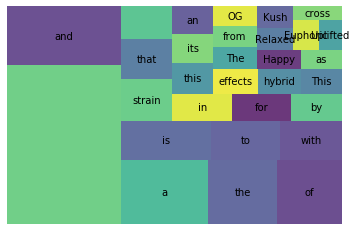

In [0]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## note above the prominance of "stop words"
(words not helpful to interpret meaning

In [0]:
# Version 2

tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['text_all'], batch_size=100):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [0]:
# Using the "Count" function
wc = count(df['tokens'])

In [0]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
16,,2351,39631,1.0,0.143821,0.143821,1.000000
24,strain,1598,4680,2.0,0.016984,0.160805,0.679711
86,,1154,3632,3.0,0.013181,0.173986,0.490855
43,sweet,1380,2651,4.0,0.009621,0.183606,0.586984
158,effects,1036,2432,5.0,0.008826,0.192432,0.440664


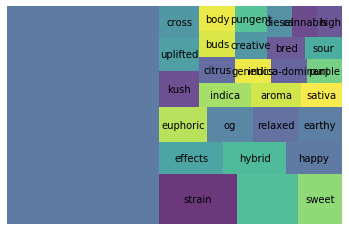

In [0]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## note above some context specific words which 
can be removed, such as buds and strain,
as they do not direct us towards the answer
of "which" buds and "which" strain we 
are aiming to select

These words can/should be added to the list of stop-words

In [0]:
wc.head(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
16,,2351,39631,1.0,0.143821,0.143821,1.000000
24,strain,1598,4680,2.0,0.016984,0.160805,0.679711
86,,1154,3632,3.0,0.013181,0.173986,0.490855
43,sweet,1380,2651,4.0,0.009621,0.183606,0.586984
158,effects,1036,2432,5.0,0.008826,0.192432,0.440664
21,hybrid,1028,2362,6.0,0.008572,0.201004,0.437261
73,happy,1892,2119,7.0,0.007690,0.208694,0.804764
7,euphoric,1680,1999,8.0,0.007254,0.215948,0.714590
22,og,466,1944,9.0,0.007055,0.223003,0.198214
38,relaxed,1736,1860,10.0,0.006750,0.229753,0.738409


In [0]:
# note: in this case words that occur only 
# in one situation may be especially important
# as we are trying to select a fixed id of y
# not a general prediction of a misc property of Y

#note: spaces need to be added
# or commas detected, for the added feature words

wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14024,wonder-kid,1,1,14145.0,0.000004,0.999931,0.000425
14032,wonder-woman,1,1,14146.0,0.000004,0.999935,0.000425
14035,wonderwoman-og,1,1,14147.0,0.000004,0.999938,0.000425
14037,wonka-s-bubbilicious,1,1,14148.0,0.000004,0.999942,0.000425
14041,woody-kush,1,1,14149.0,0.000004,0.999946,0.000425
14058,x-file,1,1,14150.0,0.000004,0.999949,0.000425
14064,x-tra-chz,1,1,14151.0,0.000004,0.999953,0.000425
14074,xxx-420,1,1,14152.0,0.000004,0.999956,0.000425
14078,xxx-og,1,1,14153.0,0.000004,0.999960,0.000425
14092,y-griega,1,1,14154.0,0.000004,0.999964,0.000425


In [0]:
# inspection of spaCy stopwords

# Spacy's Default Stop Words
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

# Adding to the List of Stopwords

strain
effects
effects,
buds
known
genetics
bred
(blank)
like
notes
flavors
patients

In [0]:
# version 1 (not excluding/removing words that overlap with flavour/effects)

#Extending The List of Stop Words

#print(type(nlp.Defaults.stop_words))
#<class 'set'>

STOP_WORDS = nlp.Defaults.stop_words.union(['strain',
                                            'effects',
                                            'effects,',
                                            'buds',
                                            'known',
                                            'genetics',
                                            'bred',
                                            '',
                                            ' ',
                                            'like',
                                            'notes',
                                            'flavors',
                                            'patients'
                                            ])

## Note: it may be worthwhile or advantagious to remove all words that may overlap with the flavour and effect columns.

In [0]:
#Extending The List of Stop Words

#print(type(nlp.Defaults.stop_words))
#<class 'set'>

STOP_WORDS = nlp.Defaults.stop_words.union(['strain',
                                            'effects',
                                            'effects,',
                                            'buds',
                                            'known',
                                            'genetics',
                                            'bred',
                                            '',
                                            ' ',
                                            'like',
                                            'notes',
                                            'flavors',
                                            'patients'
                                            ])

In [0]:
# Version 3

tokens = []

""" tokens w/o updated stopwords"""
for doc in tokenizer.pipe(df['text_all'], batch_size=100):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [0]:
# Using the "Count" function
wc = count(df['tokens'])

In [0]:
wc = count(df['tokens'])
wc.head()


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
82,,1154,3632,1.0,0.016298,0.016298,0.490855
40,sweet,1380,2651,2.0,0.011896,0.028194,0.586984
20,hybrid,1028,2362,3.0,0.010599,0.038794,0.437261
69,happy,1892,2119,4.0,0.009509,0.048302,0.804764
7,euphoric,1680,1999,5.0,0.008970,0.057273,0.714590


In [0]:
wc.head(200)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
82,,1154,3632,1.0,0.016298,0.016298,0.490855
40,sweet,1380,2651,2.0,0.011896,0.028194,0.586984
20,hybrid,1028,2362,3.0,0.010599,0.038794,0.437261
69,happy,1892,2119,4.0,0.009509,0.048302,0.804764
7,euphoric,1680,1999,5.0,0.008970,0.057273,0.714590
21,og,466,1944,6.0,0.008724,0.065996,0.198214
35,relaxed,1736,1860,7.0,0.008347,0.074343,0.738409
10,earthy,1249,1859,8.0,0.008342,0.082685,0.531263
166,kush,512,1756,9.0,0.007880,0.090565,0.217780
118,uplifted,1519,1571,10.0,0.007050,0.097614,0.646108


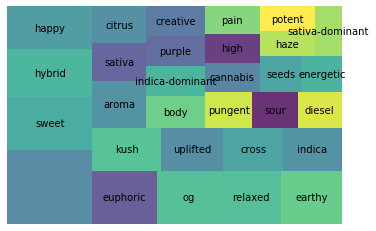

In [0]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
82,,1154,3632,1.0,0.016298,0.016298,0.490855
40,sweet,1380,2651,2.0,0.011896,0.028194,0.586984
20,hybrid,1028,2362,3.0,0.010599,0.038794,0.437261
69,happy,1892,2119,4.0,0.009509,0.048302,0.804764
7,euphoric,1680,1999,5.0,0.008970,0.057273,0.714590
21,og,466,1944,6.0,0.008724,0.065996,0.198214
35,relaxed,1736,1860,7.0,0.008347,0.074343,0.738409
10,earthy,1249,1859,8.0,0.008342,0.082685,0.531263
166,kush,512,1756,9.0,0.007880,0.090565,0.217780
118,uplifted,1519,1571,10.0,0.007050,0.097614,0.646108


In [0]:
wc.tail(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
13912,white-lsd,1,1,14104.0,0.000004,0.999780,0.000425
13915,white-lavender,1,1,14105.0,0.000004,0.999785,0.000425
13917,white-lightning,1,1,14106.0,0.000004,0.999789,0.000425
13918,white-lotus,1,1,14107.0,0.000004,0.999794,0.000425
13920,white-nightmare,1,1,14108.0,0.000004,0.999798,0.000425
13923,white-og,1,1,14109.0,0.000004,0.999803,0.000425
13925,white-queen,1,1,14110.0,0.000004,0.999807,0.000425
13927,white-rhino,1,1,14111.0,0.000004,0.999812,0.000425
13928,white-romulan,1,1,14112.0,0.000004,0.999816,0.000425
13930,white-russian,1,1,14113.0,0.000004,0.999821,0.000425


In [0]:
df.head(2)

,index,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,text_all,tokens
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,Creative Energetic Tingly Euphoric Relaxed...,"[creative, energetic, tingly, euphoric, relaxe..."
1,1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,Relaxed Aroused Creative Happy Energetic ...,"[relaxed, aroused, creative, happy, energetic,..."


# Vector Representations and Modeling

(spaCy)
doc = nlp...

spaCy vs. sklearn

In [0]:
# the strain, being y, should get a unique number

In [0]:
df.head(2)

,index,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,text_all,tokens
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,Creative Energetic Tingly Euphoric Relaxed...,"[creative, energetic, tingly, euphoric, relaxe..."
1,1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,Relaxed Aroused Creative Happy Energetic ...,"[relaxed, aroused, creative, happy, energetic,..."


# skLearn version


In [0]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import spacy

In [0]:
# Import

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, 
                   algorithm='randomized', 
                   n_iter=10)

In [0]:
params = { 
    'lsi__svd__n_components': [10,100,250],
    # these are percents 90% 95% 100%
    'lsi__vect__max_df':[.9, .95, 1.0],
    'clf__n_estimators':(5,10,25)
}

In [0]:
'''
# still being debugged

# LSI
lsi = Pipeline([('vect', vect), ('svd', svd)])


# Pipe
pipe = Pipeline([('lsi', lsi), ('clf', rfc)])

'''
# still being debugged

"\n# still being debugged\n\n# LSI\nlsi = Pipeline([('vect', vect), ('svd', svd)])\n\n\n# Pipe\npipe = Pipeline([('lsi', lsi), ('clf', rfc)])\n\n"

In [0]:
'''
# still being debugged
# Fit
grid_search = GridSearchCV(pipe,params, cv=6, n_jobs=8, verbose=1)
grid_search.fit(train['description'], train['category'])
'''
# still being debugged

"\n# still being debugged\n# Fit\ngrid_search = GridSearchCV(pipe,params, cv=6, n_jobs=8, verbose=1)\ngrid_search.fit(train['description'], train['category'])\n"

In [0]:
'''
# still being debugged
grid_search.best_score_
'''
# still being debugged

'\n# still being debugged\ngrid_search.best_score_\n'

In [0]:
'''
# still being debugged

# Predictions on test sample
pred = grid_search.predict(test['description'])
# pred = random_search.predict(test['description'])

'''
# still being debugged

"\n# still being debugged\n\n# Predictions on test sample\npred = grid_search.predict(test['description'])\n# pred = random_search.predict(test['description'])\n\n"

In [0]:
df.head(100)

,index,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,text_all,tokens
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,Creative Energetic Tingly Euphoric Relaxed...,"[creative, energetic, tingly, euphoric, relaxe..."
1,1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,Relaxed Aroused Creative Happy Energetic ...,"[relaxed, aroused, creative, happy, energetic,..."
2,2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,True,False,False,False,True,False,Uplifted Happy Relaxed Energetic Creative ...,"[uplifted, happy, relaxed, energetic, creative..."
3,3,13-Dawgs,hybrid,4.2,"Tingly, Creative, Hungry, Relaxed, Uplifted","Apricot, Citrus, Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,Tingly Creative Hungry Relaxed Uplifted A...,"[tingly, creative, hungry, relaxed, uplifted, ..."
4,4,24K-Gold,hybrid,4.6,"Happy, Relaxed, Euphoric, Uplifted, Talkative","Citrus, Earthy, Orange",Also known as Kosher Tangie 24k Gold is a 60%...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,Happy Relaxed Euphoric Uplifted Talkative ...,"[happy, relaxed, euphoric, uplifted, talkative..."
5,5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...,False,False,True,False,False,False,False,False,False,False,F

In [0]:
df['Strain'].nunique()

2350

In [0]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import spacy

In [0]:
df.head(2)

,index,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,text_all,tokens
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,Creative Energetic Tingly Euphoric Relaxed...,"[creative, energetic, tingly, euphoric, relaxe..."
1,1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,Relaxed Aroused Creative Happy Energetic ...,"[relaxed, aroused, creative, happy, energetic,..."


In [0]:
# family of variables
# maybe test train split...

train = df
test = df

In [0]:
train['Effects']

0       Creative, Energetic, Tingly, Euphoric, Relaxed
1         Relaxed, Aroused, Creative, Happy, Energetic
2        Uplifted, Happy, Relaxed, Energetic, Creative
3          Tingly, Creative, Hungry, Relaxed, Uplifted
4        Happy, Relaxed, Euphoric, Uplifted, Talkative
                             ...                      
2346     Happy, Uplifted, Relaxed, Euphoric, Energetic
2347        Relaxed, Happy, Euphoric, Uplifted, Sleepy
2348       Relaxed, Sleepy, Talkative, Euphoric, Happy
2349          Relaxed, Sleepy, Euphoric, Happy, Hungry
2350          Hungry, Relaxed, Uplifted, Happy, Sleepy
Name: Effects, Length: 2351, dtype: object

In [0]:
train.head()

,index,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,text_all,tokens
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,Creative Energetic Tingly Euphoric Relaxed...,"[creative, energetic, tingly, euphoric, relaxe..."
1,1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,Relaxed Aroused Creative Happy Energetic ...,"[relaxed, aroused, creative, happy, energetic,..."
2,2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,True,False,False,False,True,False,Uplifted Happy Relaxed Energetic Creative ...,"[uplifted, happy, relaxed, energetic, creative..."
3,3,13-Dawgs,hybrid,4.2,"Tingly, Creative, Hungry, Relaxed, Uplifted","Apricot, Citrus, Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,Tingly Creative Hungry Relaxed Uplifted A...,"[tingly, creative, hungry, relaxed, uplifted, ..."
4,4,24K-Gold,hybrid,4.6,"Happy, Relaxed, Euphoric, Uplifted, Talkative","Citrus, Earthy, Orange",Also known as Kosher Tangie 24k Gold is a 60%...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,Happy Relaxed Euphoric Uplifted Talkative ...,"[happy, relaxed, euphoric, uplifted, talkative..."


In [0]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import spacy

In [0]:
# Create Pipeline Components

vect = TfidfVectorizer(stop_words='english')
rfc = RandomForestClassifier()

In [0]:
# Import

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10, 
                   algorithm='randomized', 
                   n_iter=2)

In [0]:
vect = TfidfVectorizer(stop_words='english')
clf = RandomForestClassifier()

In [0]:
# LSI
lsi = Pipeline([('vect', vect), ('svd', svd)])

# Pipe
pipe = Pipeline([('lsi', lsi), ('clf', rfc)])

In [0]:
pipe

Pipeline(memory=None,
         steps=[('lsi',
                 Pipeline(memory=None,
                          steps=[('vect',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, max_df=1.0,
                                                  max_features=None, min_df=1,
                                                  ngram_range=(1, 1), norm='l2',
                                                  preprocessor=None,
                                                  smooth_idf=True,
                                                  stop_words='english',
                                                  strip_a

In [0]:
params = {
#    'vect__max_df': ( 0.75, 1.0),
#    'vect__min_df': (.02, .05),
#    'vect__max_features': (500,1000),
    'lsi__svd__n_components': [5,20,50],
    'lsi__vect__max_df':[.8, .93, 1.0],
    # number of estimators
    'clf__n_estimators':(1,2,4,),
    # how big is tree
    'clf__max_depth':(5,10)
}

In [0]:
'''
# debugging

# Fit
grid_search = GridSearchCV(pipe,params, cv=4, n_jobs=8, verbose=1)
grid_search.fit(train['Effects'], train['Rating'])
'''
# debugging

"\n# debugging\n\n# Fit\ngrid_search = GridSearchCV(pipe,params, cv=4, n_jobs=8, verbose=1)\ngrid_search.fit(train['Effects'], train['Rating'])\n"

# Another Test...
## Decision Tree Classifier on Effects (Works)

In [0]:
!pip install category-encoders

In [0]:
import category_encoders as ce

In [0]:


from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [0]:
df.head(1)

,index,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,text_all,tokens
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,Creative Energetic Tingly Euphoric Relaxed...,"[creative, energetic, tingly, euphoric, relaxe..."


In [0]:
# family of variables
# maybe test train split...

train = df
test = df
val = df

target = ['Strain']
features = ['Effects']
#features = ['Effects', 'Flavors']

In [0]:
#test2_features = ['Description']
test2_features = ['text_all']


In [0]:
type(test2_features)

list

In [0]:
test3_features = []
test3_f = df.loc[1, 'text_all'] 
test3_features.append(test3_f)

In [0]:
type(test3_features)

list

In [0]:

# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
X_test2 = test[test2_features]

In [0]:
X_test3 = test3_features

In [0]:


# These are the only two changes from the previous code cell:
# Remove StandardScaler (it's not needed or helpful for trees)
# Change the model from LogisticRegression to DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    #SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(random_state=42)
)



In [0]:
# Fit on train
pipeline.fit(X_train, y_train)



Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Effects'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=42,
                                        splitter='best'))],
         verbose=False)

In [0]:
# Score on train, val
print('Train Accuracy', pipeline.score(X_train, y_train))
#print('Validation Accuracy', pipeline.score(X_val, y_val))



Train Accuracy 0.704381114419396


In [0]:
# Predict on test
y_pred = pipeline.predict(X_test)

In [0]:
#,y_pred.shape

In [0]:
# Predict on test
#y_pred = pipeline.predict(X_test3)

In [0]:
X_test.head()

,Effects
0,"Creative, Energetic, Tingly, Euphoric, Relaxed"
1,"Relaxed, Aroused, Creative, Happy, Energetic"
2,"Uplifted, Happy, Relaxed, Energetic, Creative"
3,"Tingly, Creative, Hungry, Relaxed, Uplifted"
4,"Happy, Relaxed, Euphoric, Uplifted, Talkative"


...next experiment: try to make a new test file with 'customer' preferences.

# spaCy experiment 1:

term notes:

Notes: 
1. the "doc" is the file of tokens
2. the text, is the raw input before cleaning etc.
3. data may be a source file such as .txt

In [0]:
!python -m spacy download en_core_web_sm
import spacy

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


Lexical Attributes


In [0]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

In [0]:
df.loc[1, 'Description'] 

'The ‘98 Aloha White Widow is an especially potent cut of White Widow that has grown in renown alongside Hawaiian legends like Maui Wowie and Kona Gold. This White Widow phenotype reeks of diesel and skunk and has a rich earthy taste with intermittent notes of hash. Its buds are coated in trichomes  giving its dark foliage a lustrous glint to go along with its room-filling odor. This one-hitter-quitter uplifts the mind with mind-bending euphoria that materializes in the body as airy relaxation. ‘98 Aloha White Widow is available from Pua Mana 1st Hawaiian Pakalōlō Seed Bank. \xa0'

In [0]:
text1 = df.loc[1, 'Description'] 

In [0]:
# Created by processing a string of text with the nlp object
doc = nlp(text1)

# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

The
‘
98
Aloha
White
Widow
is
an
especially
potent
cut
of
White
Widow
that
has
grown
in
renown
alongside
Hawaiian
legends
like
Maui
Wowie
and
Kona
Gold
.
This
White
Widow
phenotype
reeks
of
diesel
and
skunk
and
has
a
rich
earthy
taste
with
intermittent
notes
of
hash
.
Its
buds
are
coated
in
trichomes
 
giving
its
dark
foliage
a
lustrous
glint
to
go
along
with
its
room
-
filling
odor
.
This
one
-
hitter
-
quitter
uplifts
the
mind
with
mind
-
bending
euphoria
that
materializes
in
the
body
as
airy
relaxation
.
‘
98
Aloha
White
Widow
is
available
from
Pua
Mana
1st
Hawaiian
Pakalōlō
Seed
Bank
.
 


In [0]:
print('Index:   ', [token.i for token in doc])
print('Text:    ', [token.text for token in doc])

print('is_alpha:', [token.is_alpha for token in doc])
print('is_punct:', [token.is_punct for token in doc])
print('like_num:', [token.like_num for token in doc])

Index:    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]
Text:     ['The', '‘', '98', 'Aloha', 'White', 'Widow', 'is', 'an', 'especially', 'potent', 'cut', 'of', 'White', 'Widow', 'that', 'has', 'grown', 'in', 'renown', 'alongside', 'Hawaiian', 'legends', 'like', 'Maui', 'Wowie', 'and', 'Kona', 'Gold', '.', 'This', 'White', 'Widow', 'phenotype', 'reeks', 'of', 'diesel', 'and', 'skunk', 'and', 'has', 'a', 'rich', 'earthy', 'taste', 'with', 'intermittent', 'notes', 'of', 'hash', '.', 'Its', 'buds', 'are', 'coated', 'in', 'trichomes', ' ', 'giving', 'its', 'dark', 'foliage', 'a', 'l

In [0]:
import spacy

# Load the small English model
nlp = spacy.load('en_core_web_sm')

# Process a text
doc = nlp(text1)

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

The DET
‘ ADJ
98 NUM
Aloha PROPN
White PROPN
Widow PROPN
is VERB
an DET
especially ADV
potent ADJ
cut NOUN
of ADP
White PROPN
Widow PROPN
that DET
has VERB
grown VERB
in ADP
renown NOUN
alongside ADP
Hawaiian ADJ
legends NOUN
like ADP
Maui PROPN
Wowie PROPN
and CCONJ
Kona PROPN
Gold PROPN
. PUNCT
This DET
White PROPN
Widow PROPN
phenotype VERB
reeks NOUN
of ADP
diesel NOUN
and CCONJ
skunk NOUN
and CCONJ
has VERB
a DET
rich ADJ
earthy ADJ
taste NOUN
with ADP
intermittent ADJ
notes NOUN
of ADP
hash NOUN
. PUNCT
Its DET
buds NOUN
are VERB
coated VERB
in ADP
trichomes NOUN
  SPACE
giving VERB
its DET
dark ADJ
foliage NOUN
a DET
lustrous ADJ
glint NOUN
to PART
go VERB
along PART
with ADP
its DET
room NOUN
- PUNCT
filling VERB
odor NOUN
. PUNCT
This DET
one NUM
- PUNCT
hitter NOUN
- PUNCT
quitter NOUN
uplifts NOUN
the DET
mind NOUN
with ADP
mind NOUN
- PUNCT
bending VERB
euphoria NOUN
that DET
materializes VERB
in ADP
the DET
body NOUN
as ADP
airy NOUN
relaxation NOUN
. PUNCT
‘ PUNCT
98 NUM


In [0]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

The DET det Widow
‘ ADJ punct Widow
98 NUM nummod Widow
Aloha PROPN compound Widow
White PROPN compound Widow
Widow PROPN nsubj is
is VERB ROOT is
an DET det cut
especially ADV advmod potent
potent ADJ amod cut
cut NOUN attr is
of ADP prep cut
White PROPN compound Widow
Widow PROPN pobj of
that DET nsubj grown
has VERB aux grown
grown VERB relcl cut
in ADP prep grown
renown NOUN pobj in
alongside ADP prep grown
Hawaiian ADJ amod legends
legends NOUN pobj alongside
like ADP prep legends
Maui PROPN compound Wowie
Wowie PROPN pobj like
and CCONJ cc Wowie
Kona PROPN compound Gold
Gold PROPN conj Wowie
. PUNCT punct is
This DET det phenotype
White PROPN compound Widow
Widow PROPN compound phenotype
phenotype VERB compound reeks
reeks NOUN ROOT reeks
of ADP prep reeks
diesel NOUN pobj of
and CCONJ cc diesel
skunk NOUN conj diesel
and CCONJ cc reeks
has VERB conj reeks
a DET det taste
rich ADJ amod taste
earthy ADJ amod taste
taste NOUN dobj has
with ADP prep taste
intermittent ADJ amod notes

In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")

# Process the text
doc = nlp(text1)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print("{:<12}{:<10}{:<10}".format(token_text, token_pos, token_dep))

The         DET       det       
‘           ADJ       punct     
98          NUM       nummod    
Aloha       PROPN     compound  
White       PROPN     compound  
Widow       PROPN     nsubj     
is          VERB      ROOT      
an          DET       det       
especially  ADV       advmod    
potent      ADJ       amod      
cut         NOUN      attr      
of          ADP       prep      
White       PROPN     compound  
Widow       PROPN     pobj      
that        DET       nsubj     
has         VERB      aux       
grown       VERB      relcl     
in          ADP       prep      
renown      NOUN      pobj      
alongside   ADP       prep      
Hawaiian    ADJ       amod      
legends     NOUN      pobj      
like        ADP       prep      
Maui        PROPN     compound  
Wowie       PROPN     pobj      
and         CCONJ     cc        
Kona        PROPN     compound  
Gold        PROPN     conj      
.           PUNCT     punct     
This        DET       det       
White     

Q: ...pattern matching vs. a normal 'predictive model'?


In [0]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(text1)

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": 'ADJ'}, 
#           {"POS": 'DET'}, 
           {"POS": 'NOUN', "OP":'+'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 6
Match found: potent cut
Match found: Hawaiian legends
Match found: earthy taste
Match found: intermittent notes
Match found: dark foliage
Match found: lustrous glint


# NN Simple Experiment 1

In [0]:
# so that dropping columns won't be an issue
df_nn1X = df_float.copy()
df_nn1X = df_float.copy()

In [0]:
df_nn1y = pd.read_csv('med1.csv')

In [0]:
df_nn1y['ID'] = df_nn1y['Strain'].index
df_nn1y['ID'] = df_nn1y['ID'].astype(int)

In [0]:
df_nn1X.shape

(2351, 67)

In [0]:
df_nn1y.shape

(2351, 7)

In [0]:
df_nn1y.head(1)

,Strain,Type,Rating,Effects,Flavor,Description,ID
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,0


In [0]:
df_nn1y = df_nn1y.drop(columns=['Strain',
                                'Type',
                                'Rating',
                                'Effects',
                                'Flavor',
                                'Description'])

In [0]:
df_nn1y.shape

(2351, 1)

In [0]:
arr_nn1y = df_nn1y.to_numpy()

In [0]:
# setting to integer
arr_nn1y = arr_nn1y.astype(int)

In [0]:
arr_nn1y.shape

(2351, 1)

In [0]:
type(arr_nn1y)

numpy.ndarray

In [0]:
y = arr_nn1y

In [0]:
df_nn1X['ID'].nunique()

2351

In [0]:
df_nn1X.head(1)

,index,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,ID
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [0]:
df_nn1X = df_nn1X.drop(columns=['index', 
                                'Strain', 
                                'Type', 
                                'Rating', 
                                'Effects', 
                                'Flavor', 
                                'Description',
                                'ID'])

In [0]:
df_nn1X.head(1)

,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [0]:
arr_nn1X = df_nn1X.to_numpy()

In [0]:
arr_nn1X = arr_nn1X.astype(int)

In [0]:
arr_nn1X.shape

(2351, 59)

In [0]:
X = arr_nn1X

In [0]:
X_test2 = np.squeeze(np.asarray(X))

In [0]:
y = np.squeeze(np.asarray(y))

In [0]:
inputs = X

In [0]:
correct_outputs = y

In [0]:
# set the initial random starting weights
weights = 2 * np.random.random((2351, 59)) -1

In [0]:
weights

array([[ 0.63685351,  0.45098635,  0.11437271, ...,  0.26297927,
         0.52674097,  0.5510227 ],
       [-0.03796142, -0.55074365, -0.95166334, ..., -0.1396424 ,
         0.05221185, -0.36858031],
       [ 0.15359791,  0.79066255,  0.04392892, ...,  0.73333766,
         0.01277807,  0.62563003],
       ...,
       [ 0.02540049,  0.65650558,  0.65071485, ..., -0.46548893,
        -0.6498557 ,  0.82735631],
       [-0.77046374, -0.38063579, -0.24984284, ...,  0.20094599,
         0.02017179, -0.53429408],
       [ 0.75773592, -0.51514497,  0.10658747, ..., -0.98175033,
        -0.14371569, -0.4883939 ]])

In [0]:
# this is the activiation function to be used in the NN
# creating a sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

  # caused error:
  #return float(1 / (1 + np.exp(-x)))

In [0]:
def sigmoid_derivative(x):# inspecting/testing
  sx = sigmoid(x)

  return sx * (1 - sx)  

In [0]:
'''
# Steps done before: 
# 1. Randomly initialize weights, in memory as `weights`
# 2. Get input data (X) 
# 3. Get correct_outputs (y) target
# 4. Set activation function (sigmoid) and its derivative

# Steps done here:
# (Forward propagation: through all layers from input to output)
# 5. set number of iterations
# 6. calculate weighted sum of inputs 
# 7. Activate: sigmoid activation function
# (Back propagation: going backwards through the weights/wires)
# 8. Calculating the error
# 9. Calculate adjustents
# 10. apply adjustments to weights

# Each set of wires has its own weights...

# 5 Update our weights X times e.g. 10,000
for iteration in range(10):
    
    # 6 Calculating the weighted sum of inputs
    weighted_sum = np.dot(inputs, weights)
    
    # 7 Activate: sigmoid activation function
    activated_output = sigmoid(weighted_sum)
    
    # 8 Calculating the error
    error = correct_outputs - activated_output
    
    # 9 these are the changes that will later be made to the weights
    adjustments = error * sigmoid_derivative(activated_output)
    
    # 10 Update the Weights: here the weights are changed (happens in the 'wire')
    weights += np.dot(inputs.T, adjustments)

    print("Output after training")
    print(activated_output)
  '''

'\n# Steps done before: \n# 1. Randomly initialize weights, in memory as `weights`\n# 2. Get input data (X) \n# 3. Get correct_outputs (y) target\n# 4. Set activation function (sigmoid) and its derivative\n\n# Steps done here:\n# (Forward propagation: through all layers from input to output)\n# 5. set number of iterations\n# 6. calculate weighted sum of inputs \n# 7. Activate: sigmoid activation function\n# (Back propagation: going backwards through the weights/wires)\n# 8. Calculating the error\n# 9. Calculate adjustents\n# 10. apply adjustments to weights\n\n# Each set of wires has its own weights...\n\n# 5 Update our weights X times e.g. 10,000\nfor iteration in range(10):\n    \n    # 6 Calculating the weighted sum of inputs\n    weighted_sum = np.dot(inputs, weights)\n    \n    # 7 Activate: sigmoid activation function\n    activated_output = sigmoid(weighted_sum)\n    \n    # 8 Calculating the error\n    error = correct_outputs - activated_output\n    \n    # 9 these are the chan

In [0]:
#...because it's not square?

https://www.youtube.com/watch?v=_V0Ofh_uhwU&feature=youtu.be
keras 423

In [0]:
# importing libraries
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
'''

# The data
 data = { 'x1': [0,1,0,1],
          'x2': [0,0,1,1],
          'y':  [1,1,1,0]
        }

# putting the data into a dateframe
df = pd.DataFrame.from_dict(data).astype('int')

# setting X from the dataframe
X = df[['x1', 'x2']].values

# setting y from the dataframe
y = df['y'].values

'''

"\n\n# The data\n data = { 'x1': [0,1,0,1],\n          'x2': [0,0,1,1],\n          'y':  [1,1,1,0]\n        }\n\n# putting the data into a dateframe\ndf = pd.DataFrame.from_dict(data).astype('int')\n\n# setting X from the dataframe\nX = df[['x1', 'x2']].values\n\n# setting y from the dataframe\ny = df['y'].values\n\n"

# One Layer Keras Perceptron

In [0]:

# This is a keras perceptron setup

# Define The Model
model = Sequential()
# first number after dense represents number of neurons/nodes
# for input layer, specify input dimensions => input_dim=59
model.add(Dense(1, input_dim=59, activation='sigmoid'))

# Compile The Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit The Model
model.fit(X,y, epochs=3)

Train on 2351 samples
Epoch 1/3
2351/2351 [==============================] - 0s 72us/sample - loss: nan - acc: 4.2535e-04
Epoch 2/3
2351/2351 [==============================] - 0s 43us/sample - loss: nan - acc: 4.2535e-04
Epoch 3/3
2351/2351 [==============================] - 0s 46us/sample - loss: nan - acc: 4.2535e-04


In [0]:
# evaluate the model
scores = model.evaluate(X, y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

2351/2351 [==============================] - 0s 45us/sample - loss: nan - acc: 4.2535e-04
acc: 0.04253509105183184


## inspecting test X variables

In [0]:
X_test

,Effects
0,"Creative, Energetic, Tingly, Euphoric, Relaxed"
1,"Relaxed, Aroused, Creative, Happy, Energetic"
2,"Uplifted, Happy, Relaxed, Energetic, Creative"
3,"Tingly, Creative, Hungry, Relaxed, Uplifted"
4,"Happy, Relaxed, Euphoric, Uplifted, Talkative"
...,...
2346,"Happy, Uplifted, Relaxed, Euphoric, Energetic"
2347,"Relaxed, Happy, Euphoric, Uplifted, Sleepy"
2348,"Relaxed, Sleepy, Talkative, Euphoric, Happy"
2349,"Relaxed, Sleepy, Euphoric, Happy, Hungry"


In [0]:
X_test2

array([[1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0]])

In [0]:
X_test3

['Relaxed  Aroused  Creative  Happy  Energetic  Flowery  Violet  Diesel  The ‘98 Aloha White Widow is an especially potent cut of White Widow that has grown in renown alongside Hawaiian legends like Maui Wowie and Kona Gold. This White Widow phenotype reeks of diesel and skunk and has a rich earthy taste with intermittent notes of hash. Its buds are coated in trichomes  giving its dark foliage a lustrous glint to go along with its room-filling odor. This one-hitter-quitter uplifts the mind with mind-bending euphoria that materializes in the body as airy relaxation. ‘98 Aloha White Widow is available from Pua Mana 1st Hawaiian Pakalōlō Seed Bank. \xa0  98-White-Widow  The ‘98 Aloha White Widow is an especially potent cut of White Widow that has grown in renown alongside Hawaiian legends like Maui Wowie and Kona Gold. This White Widow phenotype reeks of diesel and skunk and has a rich earthy taste with intermittent notes of hash. Its buds are coated in trichomes  giving its dark foliage 

In [0]:
X_test4 = df_nn1X.iloc[50]
X_test4.shape

(59,)

In [0]:
#scores = model.predict(X_test4)
#print(f"{model.metrics_names[1]}: {scores[1]*100}")

## NN Model 2: Multi-Layer

In [0]:
model2 = Sequential(name="3LayerJunk")

model2.add(Dense(4, input_dim=59, activation='relu', name="Dense1"))
model2.add(Dense(3, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Let's inspect our new architecture
model2.summary()

Model: "3LayerJunk"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 4)                 240       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 4         
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.fit(X, y, epochs=150, verbose=False)

In [0]:
scores = model2.evaluate(X,y)
print(f"{model2.metrics_names[1]}: {scores[1]*100}")

2351/2351 [==============================] - 0s 49us/sample - loss: -39728.9964 - acc: 4.2535e-04
acc: 0.04253509105183184


# Pickles: note Keras seems to not work with 'pickle' by design...
## in case that affects the choice of models...

## Pickle the model

In [0]:
# ? https://www.thoughtco.com/using-pickle-to-save-objects-2813661

# https://www.pythoncentral.io/how-to-pickle-unpickle-tutorial/

In [0]:
import pickle

In [0]:
#model2.save()

In [0]:
# works on pickle
pickle_out = open("model1_pickle", "wb")
pickle.dump(pipeline, pickle_out)
pickle_out.close()

In [0]:
# EDA and data handling
import numpy as np
import pandas as pd


# Modeling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [0]:
#    pickle.dump(model2, file)
#    file.close()

In [0]:
import pickle
emp = {1:"A",2:"B",3:"C",4:"D",5:"E"}
pickling_on = open("Emp.pickle","wb")
pickle.dump(emp, pickling_on)
pickling_on.close()

In [0]:
ls

Emp.pickle  med1.csv  med1.csv.1  model1_pickle  sample_data/


object_pi = model2

file_pi = open('filename_pi.obj', 'w') 

pickle.dump(object_pi, file_pi)

In [0]:
'''
object_pi = model2
file_pi = open('pickle_test_1.obj')

pickle.dump(object_pi, file_pi)
'''

"\nobject_pi = model2\nfile_pi = open('pickle_test_1.obj')\n\npickle.dump(object_pi, file_pi)\n"

In [0]:
'''
#file = open(f'resources/model_k{k}.pkl', 'wb')
# dump my model into the file specified
pickle.dump(my_model_name, file)
file.close()
'''

"\n#file = open(f'resources/model_k{k}.pkl', 'wb')\n# dump my model into the file specified\npickle.dump(my_model_name, file)\nfile.close()\n"

In [0]:
# check folder
ls

Emp.pickle  med1.csv  med1.csv.1  model1_pickle  sample_data/


# KNN model (works)

In [0]:
# establish the predictors and the target
#X = df[['sl', 'pl']]
#y = df['species']

In [0]:
# train-test split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [0]:
# instantiate the classifier
# creating a local instance of the sklearn class

mymodel = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='euclidean')


In [0]:
# fit on the training dataset
#mymodel.fit(X_train, y_train)
mymodel.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [0]:
# predict on the testing dataset
#y_preds = mymodel.predict(X_test)
y_preds = mymodel.predict(X)

In [0]:
#y_test

In [0]:
# evaluate the accuracy
#metrics.accuracy_score(y_test, y_preds)
metrics.accuracy_score(y, y_preds)

0.8838792003402808

In [0]:
# examine the confusion matrix
metrics.confusion_matrix(y, y_preds)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

## Predict for a new observation

In [0]:
# Create a fake new data point
new_obs=[[4.9, 2.7]]

In [0]:
X_test.shape

(2351, 1)

In [0]:
X_test4 = df_nn1X.iloc[50]
X_test4.shape

(59,)

In [0]:
X_test4.shape

(59,)

In [0]:
X_test4 = np.expand_dims(X_test4, axis=0)

In [0]:
# predict for our new observation
#mymodel.predict(new_obs)
mymodel.predict(X_test4)


array([50])

In [0]:
# What are the indices of the 5 neighbors nearest to that new observation?
#mymodel.kneighbors(new_obs)
#mymodel.kneighbors(X_test4)

## pickle and spaCy
https://spacy.io/usage/saving-loading

In [0]:
# needs to be done in jupyter...
# there is an alternate version of this notebook for jupyter
# with a few changes...eg. large not small spaCy en model
'''

# Create multiple KNN models and pickle for use in the plotly dash app.
for k in [5,10,15,20,25]:
    mymodel = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    mymodel.fit(X_train, y_train)
    y_pred = mymodel.predict(X_test)
    file = open(f'resources/model_k{k}.pkl', 'wb')
    # dump my model into the file specified
    pickle.dump(mymodel, file)
    file.close()
    '''

"\n\n# Create multiple KNN models and pickle for use in the plotly dash app.\nfor k in [5,10,15,20,25]:\n    mymodel = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')\n    mymodel.fit(X_train, y_train)\n    y_pred = mymodel.predict(X_test)\n    file = open(f'resources/model_k{k}.pkl', 'wb')\n    # dump my model into the file specified\n    pickle.dump(mymodel, file)\n    file.close()\n    "

#Experimenting with autoencoders...

In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
#import wandb
#from wandb.keras import WandbCallback

In [0]:
#1

In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 59 floats

# this is our input placeholder
input_img = Input(59,)

# "encoded" is the encoded representation of the input
# input image: when dense layer is called, the input will be (input_img)
encoded = Dense(encoding_dim, activation='relu')(input_img)

#sequential vs. functional
# functional more nonlinear or being called on specifically
# generative-adversarial also uses functional...
# "decoded" is the lossy reconstruction of the input
# reconstituting, reconstructing, image
decoded = Dense(59, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
# creating separate model for just the encoder
# this can be used for prediction...
encoder = Model(input_img, encoded)

# making decoder

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# as a stretch...dive into cross-entropy...understand how it works...
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
x_train = X
x_test = X

In [0]:
from tensorflow.keras.datasets import mnist
import numpy as np
#(x_train, _), (x_test, _) = mnist.load_data()

In [0]:
#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(2351, 59)
(2351, 59)


In [0]:
#wandb.init(project="autoencoder", entity="ds8")

autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose = False,
                #callbacks=[WandbCallback()]
                )

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [0]:
new_test_in = encoder.predict(X_test4)
new_test_out = decoder.predict(new_test_in)


In [0]:
new_test_out

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [0]:
#experiment 2

In [0]:
input_img = Input(shape=(59,))

encoded = Dense(128, activation='relu')(input_img)
#another layer
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
 

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(59, activation='sigmoid')(decoded)

In [0]:
# https://keras.io/optimizers/
# compile & fit model
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss='binary_crossentropy',
                    optimizer='nadam')
#wandb.init(project="autoencoder", entity="ds8")
autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose = False,
                #callbacks=[WandbCallback()]
                )

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [0]:
new_test_in = encoder.predict(X_test4)
new_test_out = decoder.predict(new_test_in)


In [0]:
new_test_out

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

# Basilica embeddings Experiment
https://www.basilica.ai/quickstart/python/

In [0]:
!pip install basilica

In [0]:
import basilica
sentences = [
    "This is a sentence!",
    "This is a similar sentence!",
    "I don't think this sentence is very similar at all...",
]
with basilica.Connection('SLOW_DEMO_KEY') as c:
    embeddings = list(c.embed_sentences(sentences))
print(embeddings)
#[[0.8556405305862427, ...], ...]

[[0.0797763, 0.112843, 0.15223, -0.0514162, -0.11669, -0.31498, 0.155153, 0.247447, -0.101151, -0.13447, -0.0265806, -0.152661, -0.183586, 0.216581, 0.187158, -0.107583, -0.0862885, 0.273021, 0.029506, -0.176715, -0.0714492, 0.0995155, -0.147944, -0.146802, 0.133688, -0.202777, 0.0646918, 0.0350237, 0.0235267, 0.246378, 0.160777, -0.161845, -0.0142224, 0.179475, -0.166726, 0.0681676, -0.123853, 0.0971506, 0.0426111, -0.0680883, -0.0429191, 0.0236387, 0.00691178, 0.00546656, -0.0749891, -0.146633, -1.32146, 0.0263213, -0.0613532, -0.0855949, 0.0716677, 0.1585, 0.121704, 0.123694, 0.0332972, -0.1032, -0.193295, 0.518967, -0.0838161, -0.140785, 0.096917, 0.0754891, -0.0639598, 0.020656, 0.0210684, 0.00439675, 0.0391588, 0.0895764, -0.107252, 0.195943, 0.0126649, -0.130685, 0.15526, 0.00765342, 0.0563673, -0.178046, 0.0766608, -0.00125241, 0.045493, 0.0820163, 0.107385, 0.0969501, -0.0683447, -0.0648411, -0.0430977, -0.0450831, -0.216582, -0.113179, 0.0333379, 0.27637, 0.00178913, 0.178865

In [0]:
type(sentences)

list

In [0]:
sentences

['This is a sentence!',
 'This is a similar sentence!',
 "I don't think this sentence is very similar at all..."]

In [0]:
from scipy import spatial
print(spatial.distance.cosine(embeddings[0], embeddings[1]))
print(spatial.distance.cosine(embeddings[0], embeddings[2]))

0.018053177545100052
0.20358934734270984


In [0]:
df.head(1)

,index,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,text_all,tokens,Effects_and_Flavor
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,Creative Energetic Tingly Euphoric Relaxed...,"[creative, energetic, tingly, euphoric, relaxe...","Creative, Energetic, Tingly, Euphoric, Relaxed..."


In [0]:
# new

item1 = df.loc[1, 'tokens']
item2 = df.loc[1, 'text_all']
item3 = df.loc[2, 'text_all']
item4 = df.loc[0, 'Effects_and_Flavor']
item5 = df.loc[2, 'Effects_and_Flavor']
item_user = "text, Relaxed, Violet, Aroused, Creative, Happy, Energetic, Flowery, Diesel"

#sentences = [item1,item2]
sentences = [item4,item5,item_user]


In [0]:
sentences

['Creative, Energetic, Tingly, Euphoric, Relaxed, Earthy, Sweet, Citrus',
 'Uplifted, Happy, Relaxed, Energetic, Creative, Spicy/Herbal, Sage, Woody',
 'text, Relaxed, Violet, Aroused, Creative, Happy, Energetic, Flowery, Diesel']

In [0]:
with basilica.Connection('36a370e3-becb-99f5-93a0-a92344e78eab') as c:
    embeddings = list(c.embed_sentences(sentences))

In [0]:
from scipy import spatial
print(spatial.distance.cosine(embeddings[0], embeddings[1]))
print(spatial.distance.cosine(embeddings[0], embeddings[2]))

0.05579170367513331
0.01642682521757688


## idea
use spaCy to generate this kind of code for each row, make a column of that info
compare what the user inputs

take user data and 
make a comparison to each cultivar
and report the best match (lowest...5 numbers?)


maybe to ~1- to flip 'lowest  number to highest?

In [0]:
# for loop for comparisons?

# .apply lambda function

# lowest number output

# retrieve name of strain...


In [0]:
#sample test

# test that user types in
user_input = "text, Relaxed, Violet, Aroused, Creative, Happy, Energetic, Flowery, Diesel"

# flavor and effect of a cultivar (a row)
item1 = df.loc[0, 'Effects_and_Flavor']

sentences = [item1,user_input]

with basilica.Connection('36a370e3-becb-99f5-93a0-a92344e78eab') as c:
  embeddings = list(c.embed_sentences(sentences))
score = 1 - spatial.distance.cosine(embeddings[0], embeddings[1])

score

0.8958629380898788

In [0]:
# make a function to look for the similarity score

score = 0

def score_the_user_input(input, score):

  # flavor and effect of a cultivar (a row)
  item1 = df.loc[0, 'Effects_and_Flavor']

  sentences = [item1,input]

  with basilica.Connection('36a370e3-becb-99f5-93a0-a92344e78eab') as c:
    embeddings = list(c.embed_sentences(sentences))
  score = 1 - spatial.distance.cosine(embeddings[0], embeddings[1])

  return score


In [0]:
user_input = "text, Relaxed, Violet, Aroused, Creative, Happy, Energetic, Flowery, Diesel"

score = score_the_user_input(user_input, score)

score

0.8958629380898788

In [0]:
# make a function to look for the similarity score

score = 0

def score_the_user_input_by_row(input, score, row1):

  # flavor and effect of a cultivar (a row)
  item1 = df.loc[row1, 'Effects_and_Flavor']

  sentences = [item1,input]

  with basilica.Connection('36a370e3-becb-99f5-93a0-a92344e78eab') as c:
    embeddings = list(c.embed_sentences(sentences))
  score = 1 - spatial.distance.cosine(embeddings[0], embeddings[1])

  return score

In [0]:
user_input = "text, Relaxed, Violet, Aroused, Creative, Happy, Energetic, Flowery, Diesel"

score = score_the_user_input_by_row(user_input, score, 0)

score

0.8958629380898788

In [0]:
df.shape

(2351, 69)

In [0]:
for i in range(2):
  score = score_the_user_input_by_row(user_input, score, i)
  print(score)

0.8958629380898788
0.9835731747824231


## store score value in column


In [0]:
# make a function to look for the similarity score

score = 0

def score_the_user_input_by_row(input, score, row1):

  # flavor and effect of a cultivar (a row)
  item1 = df.loc[row1, 'Effects_and_Flavor']

  sentences = [item1,input]

  with basilica.Connection('36a370e3-becb-99f5-93a0-a92344e78eab') as c:
    embeddings = list(c.embed_sentences(sentences))
  score = 1 - spatial.distance.cosine(embeddings[0], embeddings[1])

  return score

In [0]:
for i in range(20):
  score = score_the_user_input_by_row(user_input, score, i)
  df.loc[i,'score'] = score
  print(df.loc[i,'score'])

0.8958629380898788
0.9835731747824231
0.9267263906572931
0.8898603617876185
0.9143115221493963
0.8529647922908515
0.8755999385082817
0.8955610022961553
0.908232820950232
0.92935373487371
0.9530002546630619
0.9136784618120394
0.942677246285248
0.879898067918814
0.9269940557671099
0.9261556379649547
0.8529647922908515
0.9120787817371911
0.9004727746604987
0.9226266400220631


In [0]:
#df.nlargest(5, ['score'])
df['Strain'].groupby(df['score']).value_counts().nlargest(5, keep='last')


score     Strain                
0.983573  98-White-Widow            1
0.953000  3Rd-Coast-Panama-Chunk    1
0.942677  5Th-Element               1
0.929354  3X-Crazy                  1
0.926994  8-Ball-Kush               1
Name: Strain, dtype: int64

In [0]:
output = df['Strain'].groupby(df['score']).value_counts().nlargest(5, keep='last')

In [0]:
print(output)

score     Strain                
0.983573  98-White-Widow            1
0.953000  3Rd-Coast-Panama-Chunk    1
0.942677  5Th-Element               1
0.929354  3X-Crazy                  1
0.926994  8-Ball-Kush               1
Name: Strain, dtype: int64


In [0]:
#df.nlargest(5, ['score'])
#df['Strain'].groupby(df['score']).value_counts()

In [0]:
#df['score'].groupby(df['Strain']).value_counts().nlargest(5, keep='last')

In [0]:
#df.nlargest(5, ['score'])
#df['Strain'].groupby['score'].nlargest(10)
#df[df['Strain']=='score'].max()

In [0]:
#df.groupby('Strain')['score'].nlargest()

In [0]:
#df['score'] = df.apply(lambda i: )


In [0]:
#df['score'] = df['a'].map(lambda a: a / 2.)

Pre-calculate embedding...